In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sklearn

# print versions of libraries
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"sklearn version: {sklearn.__version__}")


C:\Users\lazni\PycharmProjects\Training\venv\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


numpy version: 1.24.4
pandas version: 2.1.3
sklearn version: 1.3.2


In [2]:
# import mnist dataset
# Sklearn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

C:\Users\lazni\PycharmProjects\Training\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# The dict keys you see above can be used for various purposes. For example, in the row below you see that you can use "data" and "target" to access features and labels of the dataset.
X, y = np.array(mnist["data"]), np.array(mnist["target"])

print("Shape of all features: ", X.shape)
print(f"Each feature is an image 28x28: {28**2=}")  # number of pixels each image has (28x28)
print("Contents of first index of features: ", X[0])
print("Shape of labels: ", y.shape)
print("Content of first index of labels: ", y[0])  # first number is labeled as 5

Shape of all features:  (70000, 784)
Each feature is an image 28x28: 28**2=784
Contents of first index of features:  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 

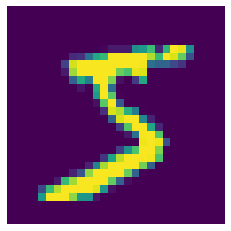

In [4]:
# Take first element of the features
some_digit = np.array(X)[0]

# Reshape the first element from 1D array to 2D array
some_digit_image = some_digit.reshape(28, 28)

# Plot the image
plt.imshow(some_digit_image)
plt.axis("off")
plt.show()

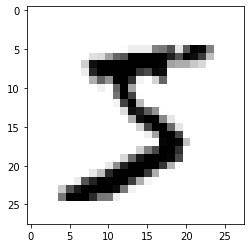

In [5]:
# Convert to black and white colors.
plt.imshow(some_digit_image, cmap="binary")
plt.show()

In [6]:
# Check label of the first image. It is number 5 just as we see on the image.
y[0]

'5'

In [7]:
# Labels are stored as strings in this dataset so let's change them to int.
print(type(y[0]))

# Convert to int
y = y.astype(np.uint8)
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


In [8]:
# Custom function of author of the book to plot multiple images in a grid. If you are interested you can check out the source code below, otherwise it is not important to understand it to continue in this notebook.
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

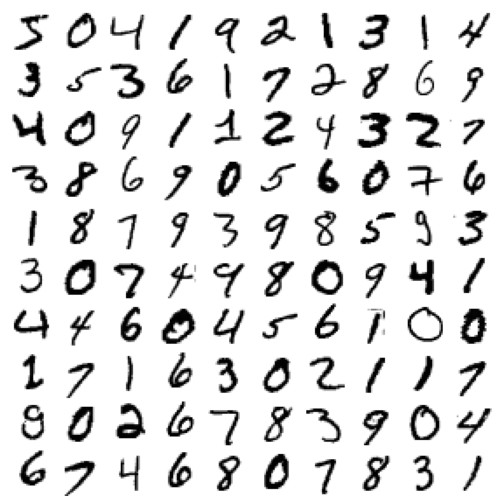

In [9]:
# Display a bunch of images in a grid.
plt.figure(figsize=(9, 9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [10]:
# Mnist dataset is already shuffled (cross-validation folds will be similar) and already split into training and test set (first 60,000 are training, remaining 10,000 are test set). 

X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

# BINARY CLASSIFIER


In [11]:
# Let's train a classifier to only predict whether number is 5 or not in this dataset. Meaning we will have only two classes: 5 and not 5.

# This numpy syntax applies to each item in array. It will return True for all 5s, and False for all other digits.
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [12]:
# See that the places where we have 5 is True, and where we don't have 5 is False.
print(y_train_5)
print(y_train)

[ True False False ...  True False False]
[5 0 4 ... 5 6 8]


In [13]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# PERFORMANCE MEASURES

#### CROSS-VALIDATION

In [14]:
# Build custom cross validation (can be useful if you want more control over it)
# Occasionally you will need more control over the cross-validation process than what Scikit-Learn provides off-the-shelf. In these cases, you can implement cross-validation yourself. The following code does roughly the same thing as Scikit-Learn’s cross_val_score() function, and prints the same result:

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# StratifiedKFold - This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
# In my own words, you can get out of this object with these parameters 3 splits. And each spilt will have 2 arrays. First array will be the indexes of the training set, and second array will be the indexes of the test set. The indexes are shuffled and stratified (meaning that each split will have same percentage of each class as the whole dataset).
number_of_splits = 3
stratified_k_folds = StratifiedKFold(
    n_splits=number_of_splits,
    shuffle=True,
    random_state=42,
)

#------------------------------------------------------------------------------------------------
# Just my own extra data to explain stuff:
print(
    "Visualisation of stratified k folds. These are only indexes which you will later use as a filter to get actual data from dataset:\n")
for train, test in stratified_k_folds.split(X_train, y_train_5):
    # In the printed data you will see that the number of data is still 60_000, but the length of train and test set will be the result of 60_000 / n_splits. In this case of 3 splits 40 vs 20 thousand.
    print(train, f"Shape: {train.shape}")
    print(test, f"Shape: {test.shape}")
    print("-" * 50)

#------------------------------------------------------------------------------------------------

print("\nActual custom implementation of cross validation:\n")
scores = []
for train_index, test_index in stratified_k_folds.split(X_train, y_train_5):
    # Clone the classifier to have the exact same model as before. Author of the book does not explain why.
    clone_classifier = clone(sgd_classifier)

    # Get the actual training and test set values from the dataset using the indexes from the stratified k folds.
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    # Train the model, predict and compute accuracy.
    clone_classifier.fit(X_train_folds, y_train_folds)
    y_pred = clone_classifier.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    result = n_correct / len(y_pred)
    scores.append(result)
    print(f"Accuracy: {result}")

print(f"Mean of all accuracy {number_of_splits} scores: {np.array(scores).mean()}")

# Still remember that the results you see here, are made on classification whether number is 5 or not.

Visualisation of stratified k folds. These are only indexes which you will later use as a filter to get actual data from dataset:

[    1     3     4 ... 59994 59996 59998] Shape: (40000,)
[    0     2     6 ... 59995 59997 59999] Shape: (20000,)
--------------------------------------------------
[    0     2     3 ... 59997 59998 59999] Shape: (40000,)
[    1    10    11 ... 59988 59989 59991] Shape: (20000,)
--------------------------------------------------
[    0     1     2 ... 59995 59997 59999] Shape: (40000,)
[    3     4     5 ... 59994 59996 59998] Shape: (20000,)
--------------------------------------------------

Actual custom implementation of cross validation:
Accuracy: 0.9669
Accuracy: 0.91625
Accuracy: 0.96785
Mean of all accuracy 3 scores: 0.9503333333333334


In [15]:
# we can use the build-in function to do the same cross-validation as above
from sklearn.model_selection import cross_val_score

results = cross_val_score(
    estimator=sgd_classifier,
    X=X_train,
    y=y_train_5,
    verbose=2,
    cv=3,
    scoring="accuracy",
)
results

[CV] END .................................................... total time=   6.4s
[CV] END .................................................... total time=   5.9s
[CV] END .................................................... total time=   4.6s


array([0.95035, 0.96035, 0.9604 ])

In [16]:
f"Accuracy from build-in sklearn function: {results.mean()}"

'Accuracy from build-in sklearn function: 0.9570333333333334'

In [17]:
# Let's pretend that we create a custom estimator that always predicts that the number is not 5, to see that accuracy is not always the best metric to use.

from sklearn.base import BaseEstimator


class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        # Create a matrix of shape X, 1. Complete array with False values.
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
np.zeros((len(X), 1), dtype=bool)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
# Our custom estimator will always predict that the number is not 5. But since we have 10 numbers, it will be right 90% of the time. So accuracy is not always the best metric to use.
never_5_clf = Never5Classifier()
print("Accuracy scores: ",
      cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy"))

Accuracy scores:  [0.91125 0.90855 0.90915]


#### CONFUSION MATRIX
If you are interested, there is also dedicated notebook for confusion matrix in this repository.

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.
# To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the cross_val_predict() function:
y_train_pred = cross_val_predict(
    estimator=sgd_classifier,
    X=X_train,
    y=y_train_5,
    cv=3
)
# Just like cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

# Check how the classifier was able to predict whether the number is 5 or not.
confusion_matrix(y_train_5, y_train_pred)
# below you can see printed confusion matrix:
# [[True negatives, False positives]
#  [False negatives, True positives]]

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# calculate precision
# meaning: How many times are you correct when you say that the number is 5?
print(f"Precision: {precision_score(y_train_5, y_train_pred)}")

# calculate recall
# meaning: How many of 5s did you detect?
print(f"Recall: {recall_score(y_train_5, y_train_pred)}")

# calculate harmonic mean of those above (harmonic mean gives more weight to low values, therefore score is going to be worse than when using normal mean, if you do not have precision and recall numbers close to each other)
print(f"F1 score (harmonic mean): {f1_score(y_train_5, y_train_pred)}")

# See below, even though our accuracy was high in previous measuring, you see that precision and recall are not that good.

Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 score (harmonic mean): 0.7325171197343846


In [22]:
# You can calculate the scores yourself using the confusion matrix array from sklearn.
cm = confusion_matrix(y_train_5, y_train_pred)

# "cm" is just an array, therefore we access the values using indexes.
print(f"Confusion matrix:\n {cm}\n")
print(f"Precision: {cm[1, 1] / (cm[0, 1] + cm[1, 1])}")
print(f"Recall: {cm[1, 1] / (cm[1, 0] + cm[1, 1])}")
print(f"F1 score: {cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)}")

Confusion matrix:
 [[53892   687]
 [ 1891  3530]]

Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 score: 0.7325171197343847


In [23]:
# DECISION FUNCTION (DECISION SCORES)
# The SGDClassifier class uses a decision function to make predictions. The decision function is computed for each instance and a score for each instance is compared to a threshold. If the score is greater than the threshold, the instance is classified as positive, and negative otherwise. The classifier uses default threshold of 0.

# you can see that the sgd_classifier.decision_function returns a score based on which is calculated a prediction
decision_score_of_some_digit = sgd_classifier.decision_function([some_digit])

print("Decision score of 'some_digit': ", decision_score_of_some_digit)

Decision score of 'some_digit':  [2164.22030239]


In [24]:
# below you can see that once the threshold changes, the result of prediction also changes
# Since the 0 is the default threshold value, the code in this cell does the same thing as if you called predict() method.
threshold = 0
y_some_digit_prediction = decision_score_of_some_digit > threshold

# Is the number 5?
y_some_digit_prediction

array([ True])

In [25]:
threshold = 8000
y_some_digit_prediction = decision_score_of_some_digit > threshold

# Is the number 5?
y_some_digit_prediction

array([False])

In [26]:
# with this function you can check decision scores of all 60_000 instances
y_decision_scores = cross_val_predict(
    estimator=sgd_classifier,
    X=X_train,
    y=y_train_5,
    cv=3,
    method="decision_function"  # this will return decision scores instead of predictions
)
y_decision_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

#### PRECISION AND RECALL TRADEOFF

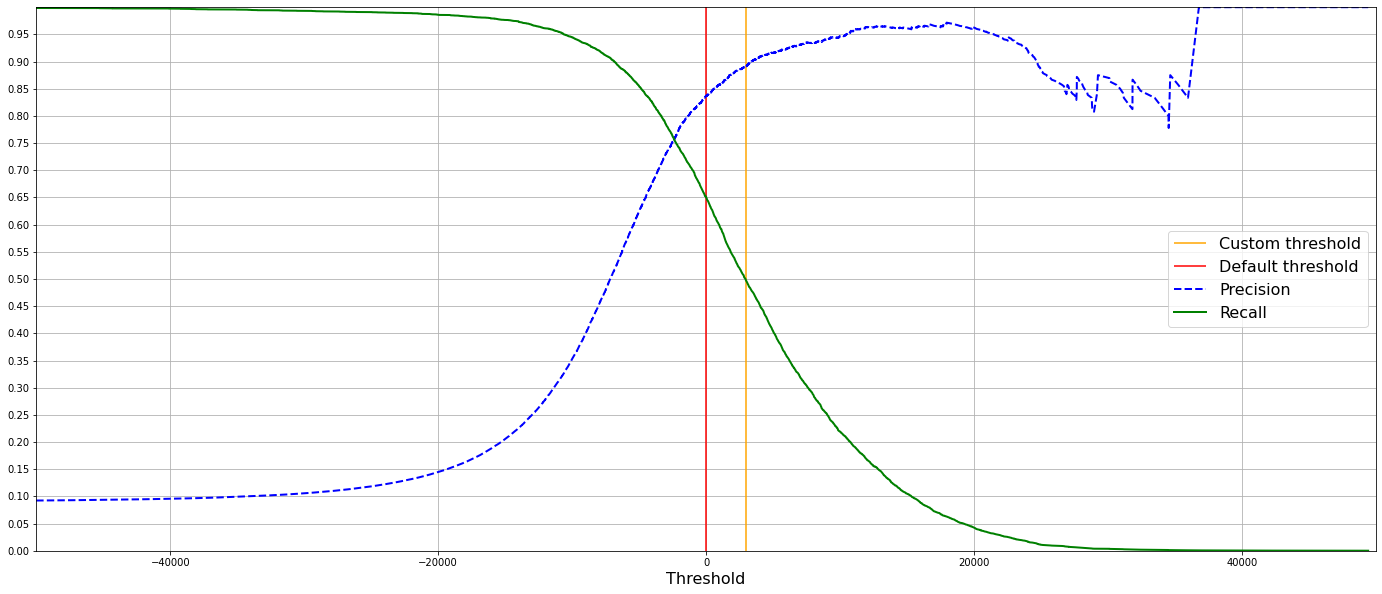

In [59]:
from sklearn.metrics import precision_recall_curve

# You can use sklearn precision_recall_curve() function to compute precision and recall for all possible thresholds. (Applies only to binary classifiers). This might be useful to you if you want to plot precision and recall vs the threshold, in case you want your model to have a specific ratio of precision or recall. With that plot you can see which threshold you need and then you can your self create a custom filter, which will return predictions based on that custom threshold vs decision scores.
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_decision_scores)

custom_threshold = 3000
default_threshold = 0


def plot_precision_recall_vs_threshold(precisions_, recalls_, thresholds_):
    plt.figure(figsize=(24, 10))
    plt.vlines(x=custom_threshold, ymin=0, ymax=1.0, colors="orange", linestyles="solid",
               label="Custom threshold")
    plt.vlines(x=default_threshold, ymin=0, ymax=1.0, colors="red", linestyles="solid",
               label="Default threshold")
    plt.plot(thresholds_, precisions_[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds_, recalls_[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.yticks(np.arange(0, 1, step=0.05))
    # plt.xticks(np.arange(-40_000, 40_000, step=5_000))
    plt.axis((-50000, 50000, 0, 1))


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Take a look at the plot below. You see that at default threshold 0, which is used for predictions normally, precision is around 85% and recall around 65%, just as we evaluated it above. (You can check it few cells above)
# In case you wanted for example 90% precision, you can see that you would need to set the threshold to around 3000. But then you would have only around 50% recall. So you can see that there is a tradeoff between precision and recall.

In [67]:
# Just an example how decision scores are evaluated to default threshold of 0.
print(f"Thresholds:\n{thresholds}\n")
print(f"Decision scores:\n{y_decision_scores}\n")
for label, decision_score in zip(y_train[:5], y_decision_scores[:5]):
    print(f"Label: {label}, Prediction: {decision_score > 0}")



Thresholds:
[-146348.56726174 -142300.00705404 -137588.97581744 ...   38871.26391927
   42216.05562787   49441.43765905]

Decision scores:
[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]

Label: 5, Prediction: True
Label: 0, Prediction: False
Label: 4, Prediction: False
Label: 1, Prediction: False
Label: 9, Prediction: False


In [92]:
# np.argmax - Returns index position of the highest value you specified in a filter
index_position_for_90_recall = np.argmax(precisions == 0.90)
recall_with_90_precision = recalls[index_position_for_90_recall]
threshold_90_precision = thresholds[index_position_for_90_recall]

# instead of calling default predict() method, we can use our filter with custom threshold which will now evaluate the array to boolean results to get our scoring to desired 90% precision
y_train_90_precision = y_decision_scores >= threshold_90_precision

print(f"Recall value with 90 precision: {recall_with_90_precision}")
print(f"Threshold value with 90 precision: {threshold_90_precision}")

Recall value with 90 precision: 0.47980077476480354
Threshold value with 90 precision: 3370.0692037709423


In [30]:
# results correspond to the plot above and also the one below
print(precision_score(y_train_5, y_train_90_precision))
print(recall_score(y_train_5, y_train_90_precision))

0.9000345901072293
0.4799852425751706


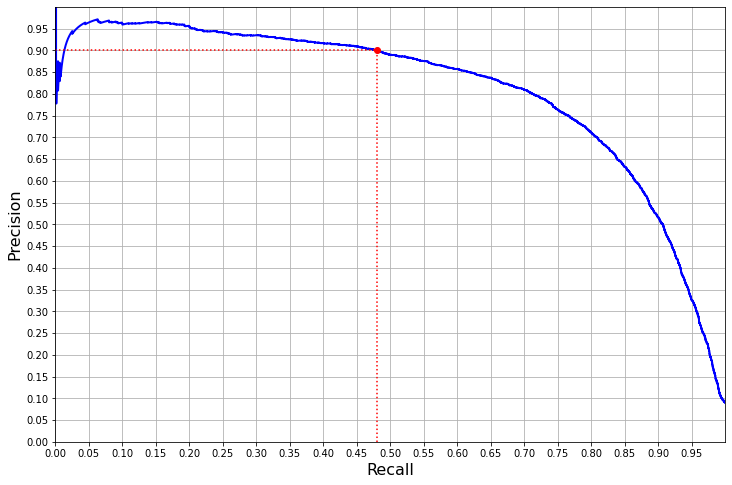

In [100]:
# Plot precision vs recall against each other

def plot_precision_vs_recall(precisions_, recalls_):
    plt.plot(recalls_, precisions_, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis((0, 1, 0, 1))
    plt.yticks(np.arange(0, 1, step=0.05))
    plt.xticks(np.arange(0, 1, step=0.05))
    plt.grid(True)


plt.figure(figsize=(12, 8))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_with_90_precision, recall_with_90_precision], [0., 0.9], "r:")  # vertical red line
plt.plot([0.0, recall_with_90_precision], [0.9, 0.9], "r:")  # horizontal red line
plt.plot([recall_with_90_precision], [0.9], "ro")  # red dot
plt.show()

# if I'm not wrong, this curve should be close to top right corner in ideal case

#### ROC CURVE (RECEIVER OPERATING CHARACTERISTICS)

In [110]:
# Another way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC.

# Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how to decide which one to use:
#   - Use Precision/Recall curve whenever the positive class is rare 
#   - Use Precision/Recall when you care more about the false positives than the false negatives

# Use the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).

from sklearn.metrics import roc_auc_score

# See, the score is high, but it does not make sense to use this metrics, since we have only 10% of 5s in the dataset. Use Precision/Recall curve instead in this case.
print(f"ROC AUC score: {roc_auc_score(y_train_5, y_decision_scores)}")

ROC AUC score: 0.9604938554008616


False positive rate at 90% precision: 0.005295076861063779
Recall at 90% precision: 0.47980077476480354


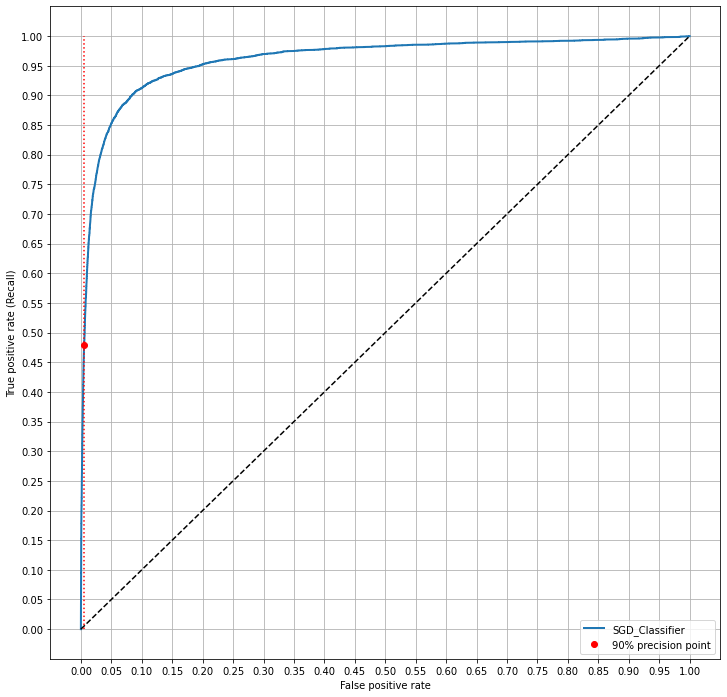

In [168]:
# The plot below shows the ROC curve. This ROC curve plots the false positive rate against the true positive rate (recall) for all possible thresholds, the red circle highlights the chosen ratio (at 47% recall) and the diagonal line is the ROC curve of purely random binary classifier which predicts 50% of each class. Recall is not visible at the graph below, but the ratio of precision and recall is kept the same, therefore the recall you see below still corresponds to  precision of 90%.
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds \
    = roc_curve(y_true=y_train_5, y_score=y_decision_scores)

# Get false positive rate at 90% precision, at 47% recall
false_positive_rate_90 = false_positive_rate[
    np.argmax(true_positive_rate >= recall_with_90_precision)]
print(f"False positive rate at 90% precision: {false_positive_rate_90}")
print(f"Recall at 90% precision: {recall_with_90_precision}")


def plot_roc_curve(fpr, tpr, label_=None):
    """
    :param fpr: false positive rate 
    :param tpr: true positive rate
    :return: 
    """
    plt.plot(fpr, tpr, linewidth=2, label=label_)
    plt.plot([false_positive_rate_90],
             [recall_with_90_precision],
             "ro",
             label="90% precision point") # red dot
    plt.plot([0, 1], [0, 1], "k--")  # dashed diagonal
    plt.grid()
    plt.yticks(np.arange(0, 1.05, step=0.05))
    plt.xticks(np.arange(0, 1.05, step=0.05))
    plt.plot([false_positive_rate_90, false_positive_rate_90], [0, 1], "r:") # vertical red line
    plt.ylabel("True positive rate (Recall)")
    plt.xlabel("False positive rate")


plt.figure(figsize=(12, 12))
plot_roc_curve(false_positive_rate, true_positive_rate, "SGD_Classifier")
plt.legend()
plt.show()

# At the plot below, you see that the lower the false positive rate the better for use.
# At the same time the higher the recall the better for us.
# Seems like the ROC plot shows us also that there is some trade-off between false positive rate and recall. The better the false positives, the worse the recall. 
# This means that ideally we want to be as close to the top left corner as possible.

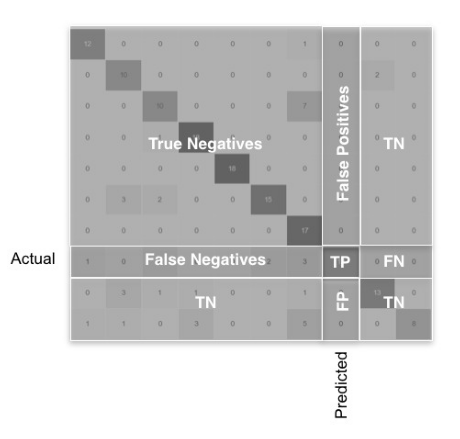

In [135]:
# Just a reminder of the confusion matrix glossary.
plt.figure(figsize=(8, 8))
image = plt.imread(r"..\performace_measurement\images\CONF_MATRIX3.jpg")
plt.axis("off")
plt.imshow(image)

y_train=array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)
y_scores_forest=array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])


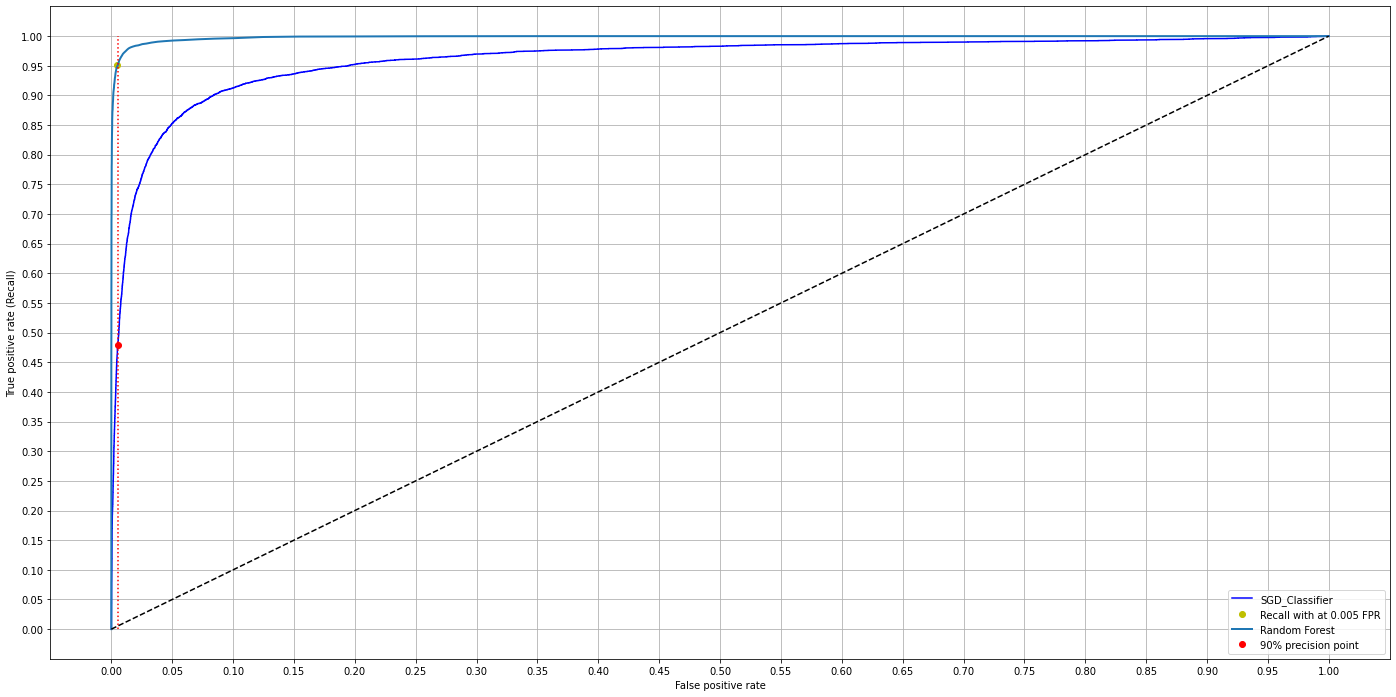

In [169]:
# Compare the roc curve of SGDClassifier vs RandomForestClassifier
# It takes 1 min to run this cell
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probabilities_forest = cross_val_predict(
    estimator=forest_clf,
    X=X_train,
    y=y_train_5,
    cv=3,
    method="predict_proba"
)


y_scores_forest = y_probabilities_forest[:, 1]  # score = probability of positive class
print(f"{y_train=}")
print(f"{y_scores_forest=}")

false_positive_rate_forest, true_positive_rate_forest, thresholds_forest \
    = roc_curve(y_true=y_train_5, y_score=y_scores_forest)

recall_for_forest = true_positive_rate_forest[np.argmax(false_positive_rate_forest >= 0.005)]

# figure is a little bit extended, so you can see the red line better
plt.figure(figsize=(24, 12))
plt.plot(false_positive_rate, true_positive_rate, "b", label="SGD_Classifier")
plt.plot([0.005], [recall_for_forest], "yo", label="Recall with at 0.005 FPR") # yellow dot
plot_roc_curve(false_positive_rate_forest, true_positive_rate_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

# Below you see that random forest is superior to SGD classifier because the curve of random forest is much closer to the top left corner compared to SGD classifier.
# For demonstration purposes, I keep the original red dot at the same place, and I extended the red line to the top. Now you see that with the new random forest classifier, we are much closer to the top left corner and we have about 95% recall at the same FPR as before.

# MULTICLASS CLASSIFICATION

In [ ]:
# there are two main systems how to handle multiclass clas. like MNIST

# 1. Use ten binary classifiers to identify score for each number (OneVersusRest)
# 2. Use combination of two numbers out of ten and return score for each of those combinations
#     That means train 45 classifiers, to have all possible combinations (OneVersusOne)
# Scikit learn detects automatically what is the best

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)  # y_train not y_train_5
svm_clf.predict([some_digit])

# here it should correctly predict that the number is 5


In [ ]:
# you can check the cores for each number
# you can see that the 5th index is highest meaning number 5 was chosen as a result

some_digit_socres = svm_clf.decision_function([some_digit])
print(some_digit_socres)

# 5th position has greates value
print(np.argmax(some_digit_socres))


In [ ]:
# check classes - basically types of y labels
print(svm_clf.classes_)
print(svm_clf.classes_[5])


In [ ]:
# if you want to directly one-versus-one or one-versus-rest
#   you can use Clases from sklearn

# pass support vector classifier directly as a paramter
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())

ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [ ]:
# check also how SGD classifier fares
from sklearn.multiclass import OneVsRestClassifier

sgd_classifier = OneVsRestClassifier(SGDClassifier())

sgd_classifier.fit(X_train, y_train)
sgd_classifier.predict([some_digit])


In [ ]:
# check the results of "decision function"
# again, highest number here should correspond to the right result.
# (Right restul should be again number 5)
sgd_classifier.decision_function([some_digit])

In [ ]:
# lets evaluate sgd_clf using crossvalidation
# here it should return 3 results representing models accuracy
cross_val_score(sgd_classifier, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
# lets scale our features with standart scaler and get better resuts out of
#   crossvalidaiton

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_classifier, X_train_scaled, y_train, cv=3, scoring="accuracy")

# Error analysis

In [ ]:
# check confusion matrix

# make predictions using "cross_val_predict()"

y_train_pred = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv=3)


In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
# look at image representation of confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# sometimes there might be uneven number of labels, therefore lets normalise
#   confusion matrix - divide each number in a given row with its sum

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# check using subplots actual and wrongly labeled images
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8, 8))

plt.subplot(221);
plot_digits = (X_aa[:25], images_per_row=5))
plt.subplot(222);
plot_digits = (X_ab[:25], images_per_row=5))
plt.subplot(223);
plot_digits = (X_ba[:25], images_per_row=5))
plt.subplot(224);
plot_digits = (X_bb[:25], images_per_row=5))
plt.show()

In [ ]:
X_aa

# Multilabel classificaiton
example - face recognition program. Program has been trained to reckognize Alice, Bob and Charlie. Now when we show it picture where are together Alice and Charlie it should output [1, 0, 1] (Yes, No, Yes)

In [ ]:
# some not in depth example
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= 7
y_train_odd = y_train % 2 == 1

# np.c_ made here y_train_large the first column, and y_train_odd second
y_multilabel = np.c_[y_train_large, y_train_odd]

y_multilabel

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
# first item says that digits it not large (digit>7) and second item says
#   that digit is odd (digit % 2 == 1)

# some digit = 5
knn_clf.predict([some_digit])

In [ ]:
# example how to evalueate multilable classification (using F1 score)
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")

# Multioutput-Multiclass Classification
Exmpale: Output each pixel of a photo with each pixel having value from 0-255 

In [ ]:
# lets create a simple example of removing noise from artifitialy 
#   changed MNIST images

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [ ]:
# with noise
plt.imshow(X_train_mod[0].reshape((28, 28)), cmap="binary")

In [ ]:
# original, now label to the one with noise
plt.imshow(y_train_mod[0].reshape((28, 28)), cmap="binary")

In [ ]:
# predict
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plt.imshow(clean_digit.reshape((28, 28)), cmap="binary")


In [ ]:
# former image
plt.imshow(X_test_mod[0].reshape((28, 28)), cmap="binary")